# TODO

In [1]:
import pickle
from ddm_utils import parse_sim_results, run_bads_3param, ex22_bads_plots
import numpy as np
import matplotlib.pyplot as plt
import re

# Bad ressults due to large range

```
    lower_bounds = np.array([-10, 0.1, 0.1]) 
    upper_bounds = np.array([10, 15, 0.9])

    plausible_lower_bounds = np.array([-5, 1, 0.2])
    plausible_upper_bounds = np.array([5, 13, 0.8])

```

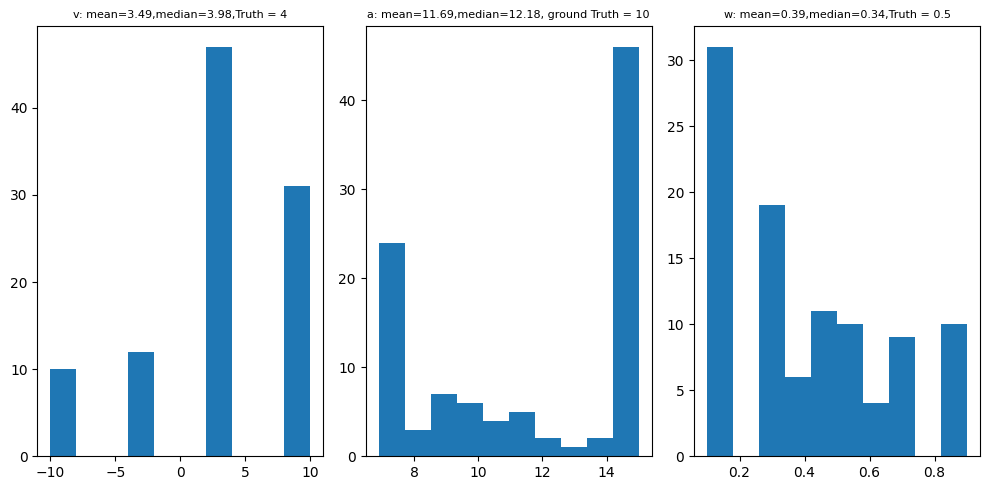

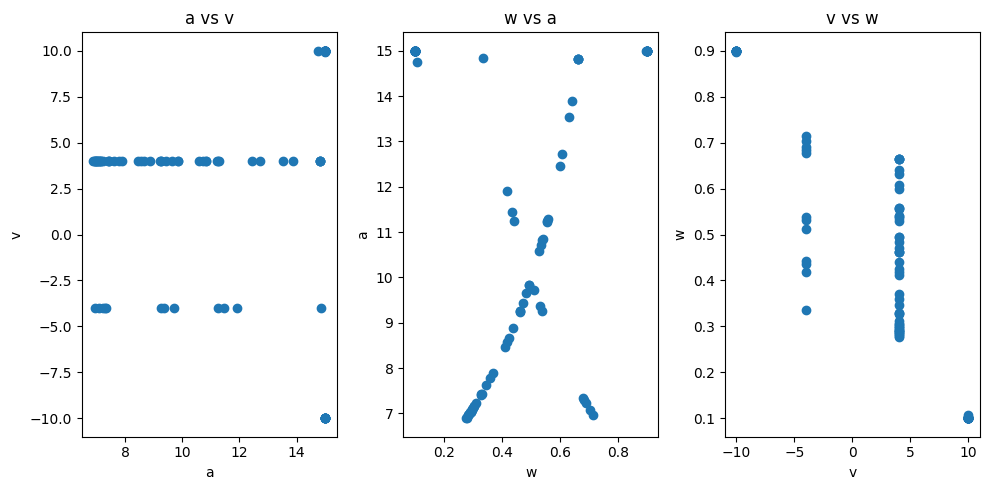

In [2]:
filename = 'vaw_bads_vals_v4_a10.pkl'
ex22_bads_plots(filename)

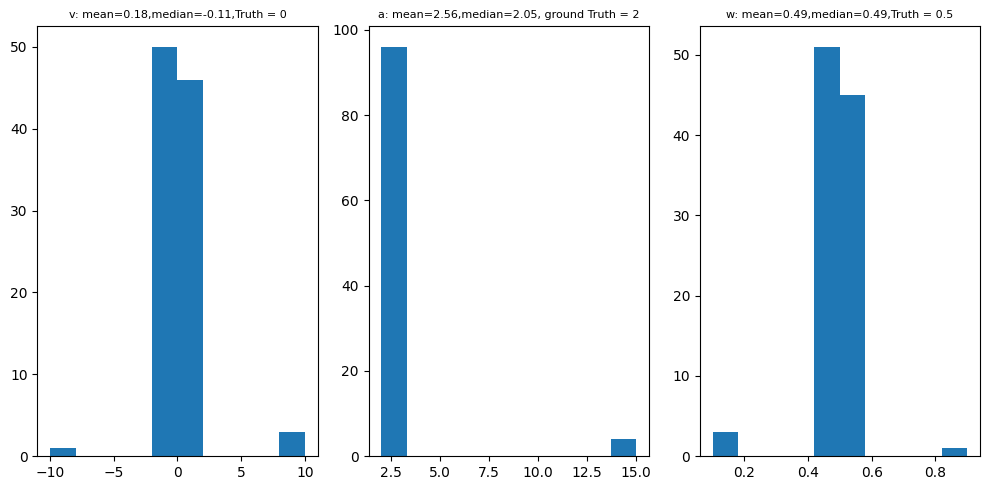

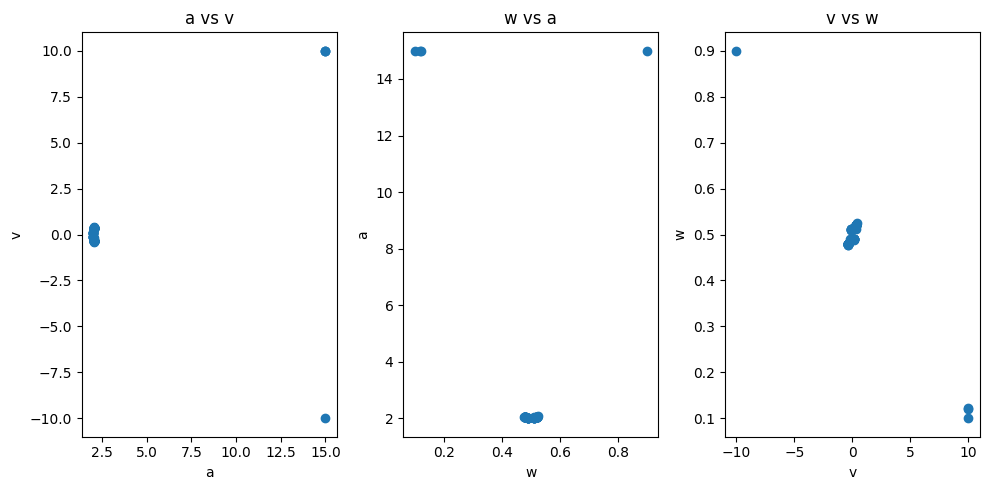

In [3]:
filename = 'vaw_bads_vals_v0_a2.pkl'
ex22_bads_plots(filename)

# Can you get Good results by shortening the range?

```
lower_bounds = np.array([0.1, 0.1, 0.1]) 
upper_bounds = np.array([7, 5, 0.9])

plausible_lower_bounds = np.array([0.5, 1, 0.3])
plausible_upper_bounds = np.array([5, 4, 0.7])
```

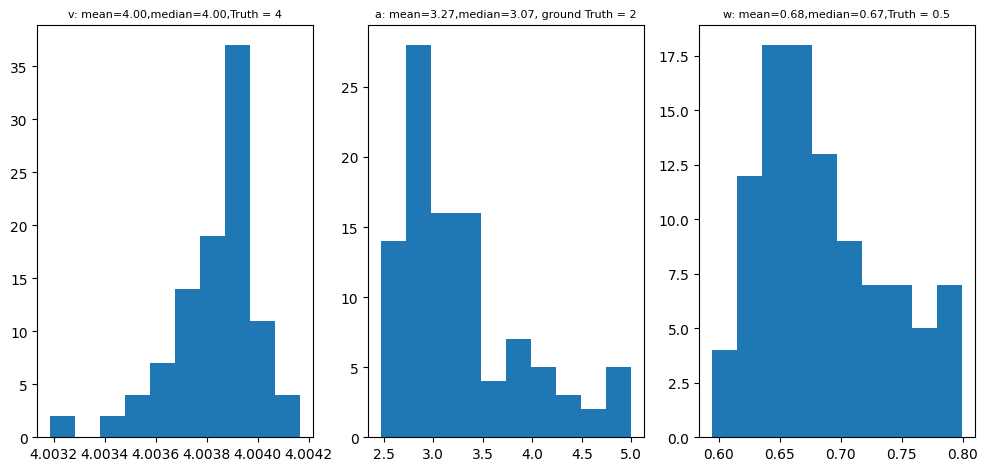

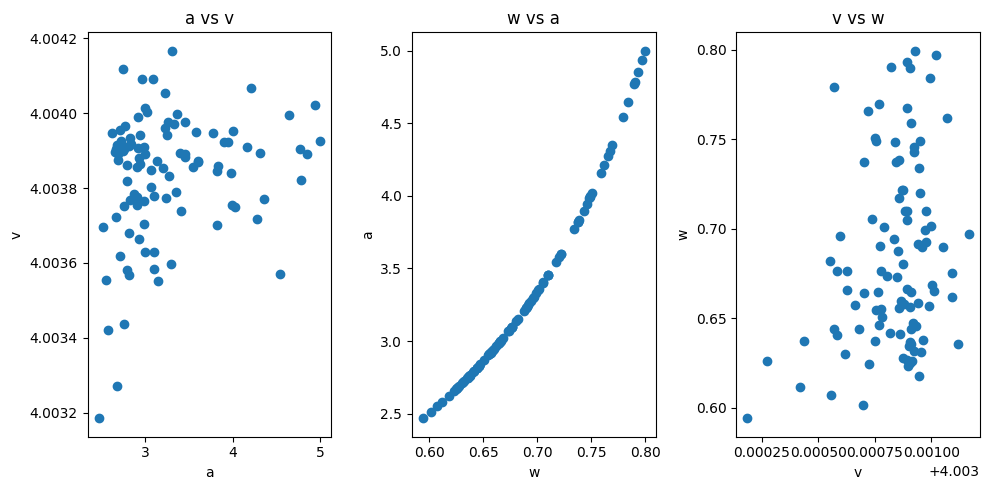

In [6]:
filename = 'vaw_bads_vals_v4_a2.pkl'
ex22_bads_plots(filename)

```
lower_bounds = np.array([0.5, 5, 0.2]) 
upper_bounds = np.array([5, 15, 0.8])

plausible_lower_bounds = np.array([1, 7, 0.3])
plausible_upper_bounds = np.array([4, 12, 0.7]
```

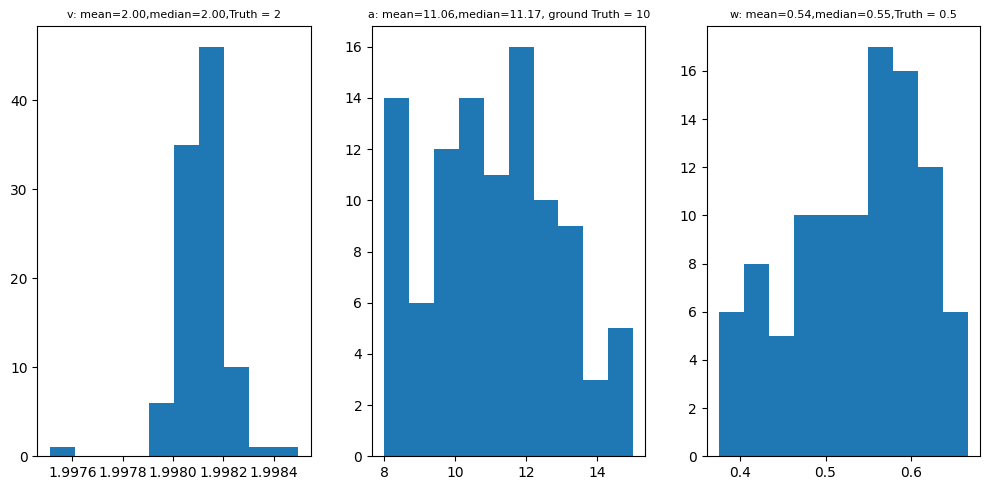

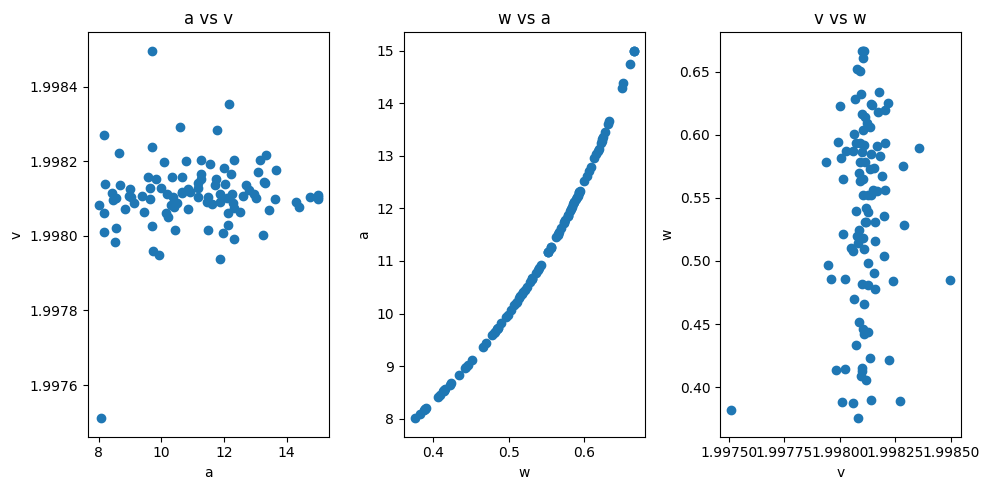

In [7]:
filename = 'vaw_bads_vals_v2_a10.pkl'
ex22_bads_plots(filename)

```
lower_bounds = np.array([0.5, 5, 0.2]) 
    upper_bounds = np.array([5, 15, 0.8])

    plausible_lower_bounds = np.array([1, 8.5, 0.3])
    plausible_upper_bounds = np.array([4, 11.5, 0.7])
```

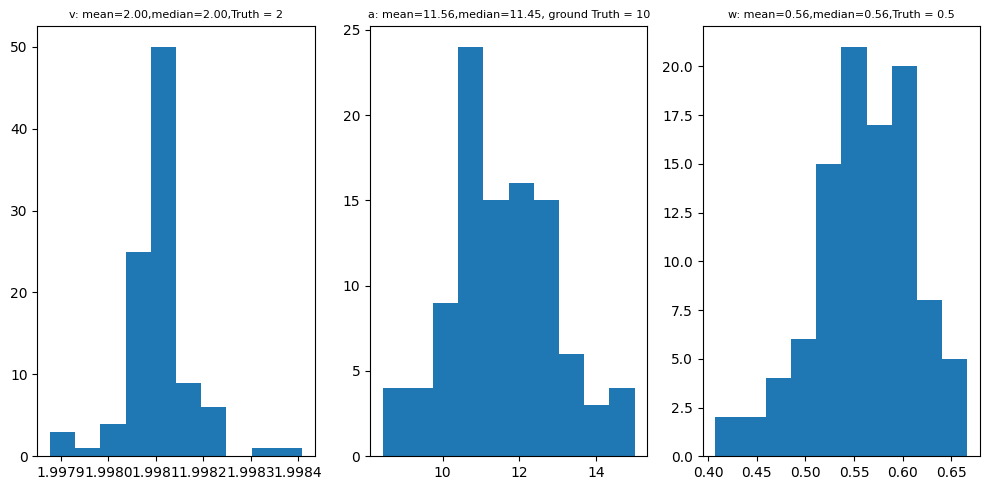

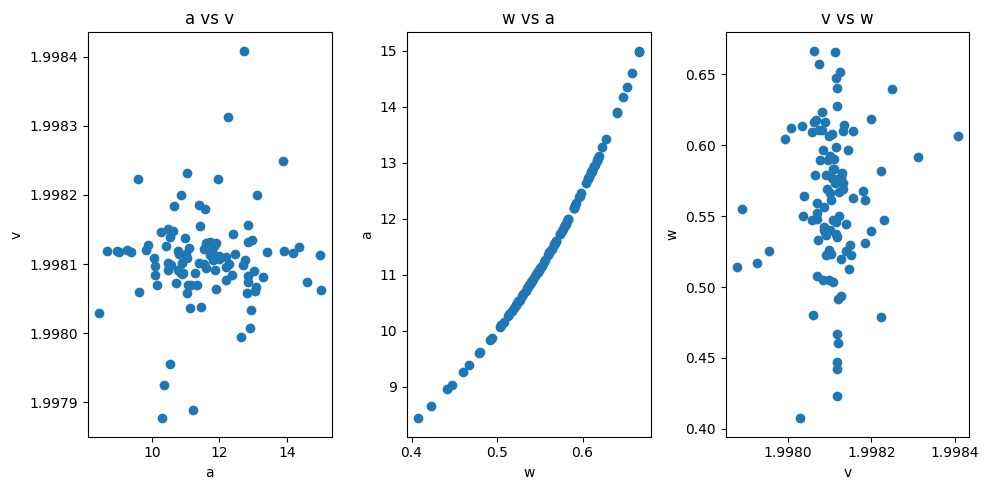

In [8]:
filename = 'vaw_bads_vals_v2_a10.pkl'
ex22_bads_plots(filename)